# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="F:\Jupyter\deep-reinforcement-learning\Deep Tennis\Tennis_Windows_x86_64\Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [6]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.0
Score (max over agents) from episode 2: 0.0
Score (max over agents) from episode 3: 0.10000000149011612
Score (max over agents) from episode 4: 0.0
Score (max over agents) from episode 5: 0.10000000149011612


When finished, you can close the environment.

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [7]:
%load_ext autoreload
%autoreload 2

In [8]:
from ddpg_agent import *

In [9]:
num_agents = len(env_info.agents)
agents = Agent(state_size=state_size, action_size=action_size, num_agents=num_agents, random_seed=0)

In [10]:
def ddpg(n_episodes=2000):
    """Deep Deterministic Policy Gradient.
    
    Args
        n_episodes (int): maximum number of training episodes
    Return:
        scores (average score)

    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores

    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations
        agents.reset()
        score = np.zeros(num_agents)
        while True:
            action = agents.act(state)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations   # get the next state
            rewards = env_info.rewards                   # get the reward
            dones = env_info.local_done                  # see if episode has finished
            
            agents.step(state, action, rewards, next_state, dones)
            score += rewards                                # update the score
            state = next_state                             # roll over the state to next time step
            if np.any(dones):                                       # exit loop if episode finished
                break
        scores_window.append(np.mean(score))       # save most recent score
        scores.append(np.mean(score))              # save most recent score
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=0.5:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            torch.save(agents.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agents.critic_local.state_dict(), 'checkpoint_critic.pth')
    return scores

In [11]:
scores = ddpg()

Episode 100	Average Score: -0.00
Episode 200	Average Score: -0.00
Episode 300	Average Score: 0.010
Episode 400	Average Score: 0.01
Episode 500	Average Score: 0.03
Episode 600	Average Score: 0.07
Episode 700	Average Score: 0.31
Episode 800	Average Score: 0.34
Episode 885	Average Score: 0.51
Environment solved in 885 episodes!	Average Score: 0.51
Episode 886	Average Score: 0.52
Environment solved in 886 episodes!	Average Score: 0.52
Episode 887	Average Score: 0.51
Environment solved in 887 episodes!	Average Score: 0.51
Episode 888	Average Score: 0.51
Environment solved in 888 episodes!	Average Score: 0.51
Episode 889	Average Score: 0.51
Environment solved in 889 episodes!	Average Score: 0.51
Episode 890	Average Score: 0.51
Environment solved in 890 episodes!	Average Score: 0.51
Episode 891	Average Score: 0.53
Environment solved in 891 episodes!	Average Score: 0.53
Episode 892	Average Score: 0.54
Environment solved in 892 episodes!	Average Score: 0.54
Episode 893	Average Score: 0.53
Envir

Episode 979	Average Score: 0.55
Environment solved in 979 episodes!	Average Score: 0.55
Episode 980	Average Score: 0.54
Environment solved in 980 episodes!	Average Score: 0.54
Episode 981	Average Score: 0.53
Environment solved in 981 episodes!	Average Score: 0.53
Episode 982	Average Score: 0.53
Environment solved in 982 episodes!	Average Score: 0.53
Episode 983	Average Score: 0.53
Environment solved in 983 episodes!	Average Score: 0.53
Episode 984	Average Score: 0.52
Environment solved in 984 episodes!	Average Score: 0.52
Episode 985	Average Score: 0.50
Environment solved in 985 episodes!	Average Score: 0.50
Episode 986	Average Score: 0.50
Environment solved in 986 episodes!	Average Score: 0.50
Episode 987	Average Score: 0.50
Environment solved in 987 episodes!	Average Score: 0.50
Episode 988	Average Score: 0.50
Environment solved in 988 episodes!	Average Score: 0.50
Episode 989	Average Score: 0.50
Environment solved in 989 episodes!	Average Score: 0.50
Episode 990	Average Score: 0.50


Episode 1093	Average Score: 0.50
Environment solved in 1093 episodes!	Average Score: 0.50
Episode 1100	Average Score: 0.43
Episode 1200	Average Score: 0.41
Episode 1216	Average Score: 0.50
Environment solved in 1216 episodes!	Average Score: 0.50
Episode 1220	Average Score: 0.50
Environment solved in 1220 episodes!	Average Score: 0.50
Episode 1223	Average Score: 0.50
Environment solved in 1223 episodes!	Average Score: 0.50
Episode 1224	Average Score: 0.52
Environment solved in 1224 episodes!	Average Score: 0.52
Episode 1225	Average Score: 0.52
Environment solved in 1225 episodes!	Average Score: 0.52
Episode 1226	Average Score: 0.53
Environment solved in 1226 episodes!	Average Score: 0.53
Episode 1227	Average Score: 0.53
Environment solved in 1227 episodes!	Average Score: 0.53
Episode 1228	Average Score: 0.53
Environment solved in 1228 episodes!	Average Score: 0.53
Episode 1229	Average Score: 0.53
Environment solved in 1229 episodes!	Average Score: 0.53
Episode 1230	Average Score: 0.53
E

Episode 1311	Average Score: 0.65
Environment solved in 1311 episodes!	Average Score: 0.65
Episode 1312	Average Score: 0.64
Environment solved in 1312 episodes!	Average Score: 0.64
Episode 1313	Average Score: 0.64
Environment solved in 1313 episodes!	Average Score: 0.64
Episode 1314	Average Score: 0.62
Environment solved in 1314 episodes!	Average Score: 0.62
Episode 1315	Average Score: 0.62
Environment solved in 1315 episodes!	Average Score: 0.62
Episode 1316	Average Score: 0.60
Environment solved in 1316 episodes!	Average Score: 0.60
Episode 1317	Average Score: 0.60
Environment solved in 1317 episodes!	Average Score: 0.60
Episode 1318	Average Score: 0.62
Environment solved in 1318 episodes!	Average Score: 0.62
Episode 1319	Average Score: 0.63
Environment solved in 1319 episodes!	Average Score: 0.63
Episode 1320	Average Score: 0.62
Environment solved in 1320 episodes!	Average Score: 0.62
Episode 1321	Average Score: 0.63
Environment solved in 1321 episodes!	Average Score: 0.63
Episode 13

Episode 1403	Average Score: 0.64
Environment solved in 1403 episodes!	Average Score: 0.64
Episode 1404	Average Score: 0.61
Environment solved in 1404 episodes!	Average Score: 0.61
Episode 1405	Average Score: 0.61
Environment solved in 1405 episodes!	Average Score: 0.61
Episode 1406	Average Score: 0.61
Environment solved in 1406 episodes!	Average Score: 0.61
Episode 1407	Average Score: 0.63
Environment solved in 1407 episodes!	Average Score: 0.63
Episode 1408	Average Score: 0.62
Environment solved in 1408 episodes!	Average Score: 0.62
Episode 1409	Average Score: 0.63
Environment solved in 1409 episodes!	Average Score: 0.63
Episode 1410	Average Score: 0.64
Environment solved in 1410 episodes!	Average Score: 0.64
Episode 1411	Average Score: 0.64
Environment solved in 1411 episodes!	Average Score: 0.64
Episode 1412	Average Score: 0.64
Environment solved in 1412 episodes!	Average Score: 0.64
Episode 1413	Average Score: 0.63
Environment solved in 1413 episodes!	Average Score: 0.63
Episode 14

Episode 1512	Average Score: 0.52
Environment solved in 1512 episodes!	Average Score: 0.52
Episode 1513	Average Score: 0.53
Environment solved in 1513 episodes!	Average Score: 0.53
Episode 1514	Average Score: 0.53
Environment solved in 1514 episodes!	Average Score: 0.53
Episode 1515	Average Score: 0.53
Environment solved in 1515 episodes!	Average Score: 0.53
Episode 1516	Average Score: 0.54
Environment solved in 1516 episodes!	Average Score: 0.54
Episode 1517	Average Score: 0.57
Environment solved in 1517 episodes!	Average Score: 0.57
Episode 1518	Average Score: 0.58
Environment solved in 1518 episodes!	Average Score: 0.58
Episode 1519	Average Score: 0.58
Environment solved in 1519 episodes!	Average Score: 0.58
Episode 1520	Average Score: 0.58
Environment solved in 1520 episodes!	Average Score: 0.58
Episode 1521	Average Score: 0.57
Environment solved in 1521 episodes!	Average Score: 0.57
Episode 1522	Average Score: 0.55
Environment solved in 1522 episodes!	Average Score: 0.55
Episode 15

Episode 1605	Average Score: 0.61
Environment solved in 1605 episodes!	Average Score: 0.61
Episode 1606	Average Score: 0.61
Environment solved in 1606 episodes!	Average Score: 0.61
Episode 1607	Average Score: 0.61
Environment solved in 1607 episodes!	Average Score: 0.61
Episode 1608	Average Score: 0.61
Environment solved in 1608 episodes!	Average Score: 0.61
Episode 1609	Average Score: 0.60
Environment solved in 1609 episodes!	Average Score: 0.60
Episode 1610	Average Score: 0.59
Environment solved in 1610 episodes!	Average Score: 0.59
Episode 1611	Average Score: 0.57
Environment solved in 1611 episodes!	Average Score: 0.57
Episode 1612	Average Score: 0.55
Environment solved in 1612 episodes!	Average Score: 0.55
Episode 1613	Average Score: 0.54
Environment solved in 1613 episodes!	Average Score: 0.54
Episode 1614	Average Score: 0.54
Environment solved in 1614 episodes!	Average Score: 0.54
Episode 1615	Average Score: 0.54
Environment solved in 1615 episodes!	Average Score: 0.54
Episode 16

Episode 1842	Average Score: 0.65
Environment solved in 1842 episodes!	Average Score: 0.65
Episode 1843	Average Score: 0.65
Environment solved in 1843 episodes!	Average Score: 0.65
Episode 1844	Average Score: 0.65
Environment solved in 1844 episodes!	Average Score: 0.65
Episode 1845	Average Score: 0.63
Environment solved in 1845 episodes!	Average Score: 0.63
Episode 1846	Average Score: 0.63
Environment solved in 1846 episodes!	Average Score: 0.63
Episode 1847	Average Score: 0.62
Environment solved in 1847 episodes!	Average Score: 0.62
Episode 1848	Average Score: 0.62
Environment solved in 1848 episodes!	Average Score: 0.62
Episode 1849	Average Score: 0.62
Environment solved in 1849 episodes!	Average Score: 0.62
Episode 1850	Average Score: 0.62
Environment solved in 1850 episodes!	Average Score: 0.62
Episode 1851	Average Score: 0.62
Environment solved in 1851 episodes!	Average Score: 0.62
Episode 1852	Average Score: 0.63
Environment solved in 1852 episodes!	Average Score: 0.63
Episode 18

In [12]:
%matplotlib inline

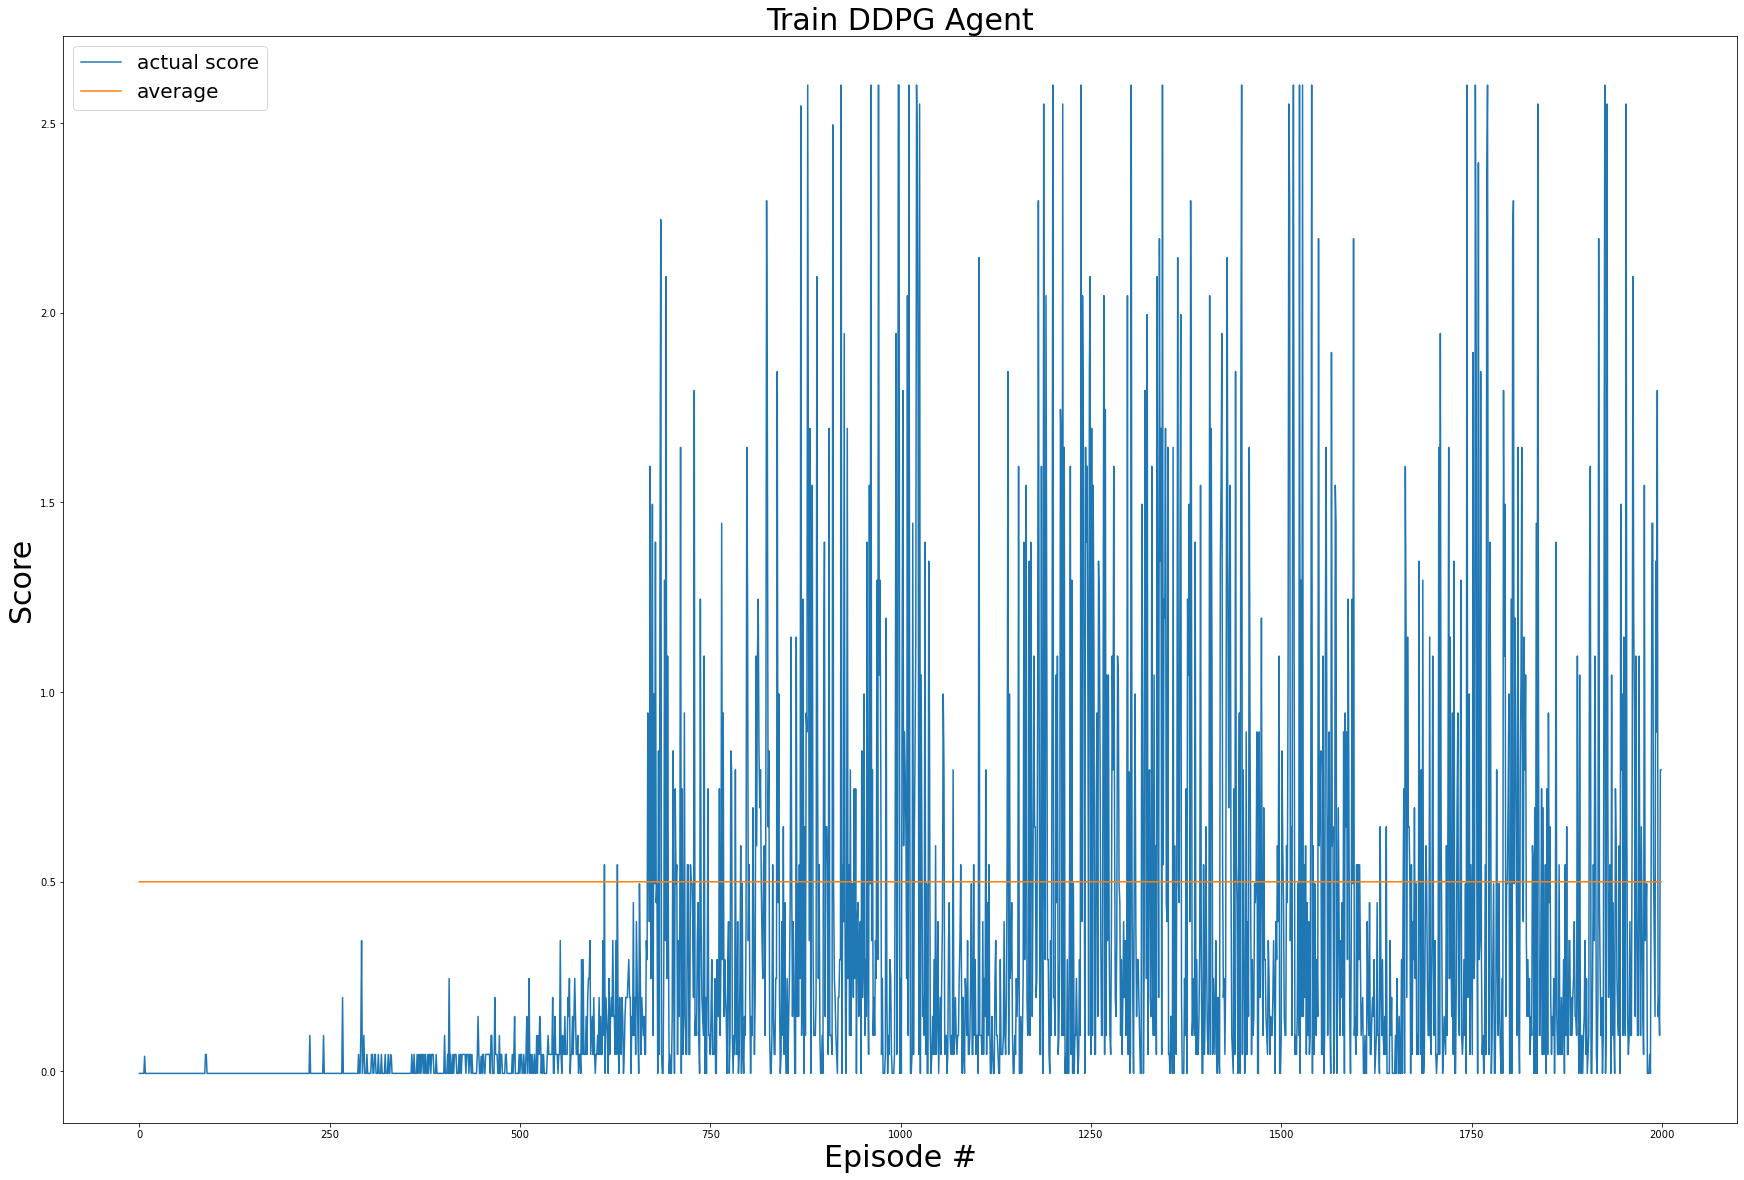

In [14]:
import matplotlib.pyplot as plt 

# plot the scores
average_score = 0.5
success = [average_score] * len(scores)
fig = plt.figure(figsize=(30,20))
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores,np.arange(len(scores)), success)
plt.ylabel('Score', fontsize = 30)
plt.xlabel('Episode #', fontsize = 30)
plt.title('Train DDPG Agent', fontsize = 30)
plt.gca().legend(('actual score','average'), fontsize = 20)
plt.show()

In [15]:
agents.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
agents.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))

env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = agents.act(states,add_noise = False) # select an action (for each agent)
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))
        

Total score (averaged over agents) this episode: 2.550000037997961


In [16]:
env.close()